<a href="https://colab.research.google.com/github/IdajiliJohnOjochegbe/Walmart-Sales-Forecast/blob/main/walemart_sales_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load dataset from drive

In [ ]:
import pandas as pd
data = data = pd.read_csv('/content/drive/MyDrive/walmart sales forecast/train.csv')


# View the dataset

In [ ]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

# Linear Regression Method

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'train.csv' is in the same directory
# data = pd.read_csv('train.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract year, month, and day as separate numerical features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Example: Using 'Year', 'Month', and 'Day' columns along with 'Weekly_Sales'
X = data[['Year', 'Month', 'Day']]
y = data['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 521101358.42285055


# Long Short-Term Memory Method

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


In [ ]:
print(data.columns)


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month',
       'Day'],
      dtype='object')


# Extract numeric features for scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your data
data = pd.read_csv('/content/drive/MyDrive/walmart sales forecast/train.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract 'Year', 'Month', and 'Day' components
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Extract only numeric features for scaling
numeric_features = data[['Year', 'Month', 'Day']]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numeric features
scaled_data = scaler.fit_transform(numeric_features)

# Use the scaled data for further processing or modeling


In [ ]:


# Scale target variable 'Weekly_Sales' if necessary
target_scaler = MinMaxScaler()
data['Weekly_Sales_Scaled'] = target_scaler.fit_transform(data[['Weekly_Sales']])


In [ ]:
def generate_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = generate_sequences(data[['Year', 'Month', 'Day', 'Weekly_Sales_Scaled']].values, seq_length)


In [ ]:
split = int(len(data) * 0.8)  # 80% train, 20% test
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


Epoch 1/100
10540/10540 [==============================] - 87s 8ms/step - loss: 963930.5625 - val_loss: 920320.9375
Epoch 2/100
10540/10540 [==============================] - 84s 8ms/step - loss: 883886.3125 - val_loss: 849763.5625
Epoch 3/100
10540/10540 [==============================] - 83s 8ms/step - loss: 823844.2500 - val_loss: 798793.0625
Epoch 4/100
10540/10540 [==============================] - 85s 8ms/step - loss: 783722.1250 - val_loss: 767128.5000
Epoch 5/100
10540/10540 [==============================] - 87s 8ms/step - loss: 762909.1875 - val_loss: 753916.2500
Epoch 6/100
10540/10540 [==============================] - 83s 8ms/step - loss: 757940.9375 - val_loss: 752854.8750
Epoch 7/100
10540/10540 [==============================] - 89s 8ms/step - loss: 757698.6875 - val_loss: 752846.8125
Epoch 8/100
10540/10540 [==============================] - 83s 8ms/step - loss: 757515.4375 - val_loss: 752843.9375
Epoch 9/100
10540/10540 [==============================] - 87s 8ms/step 

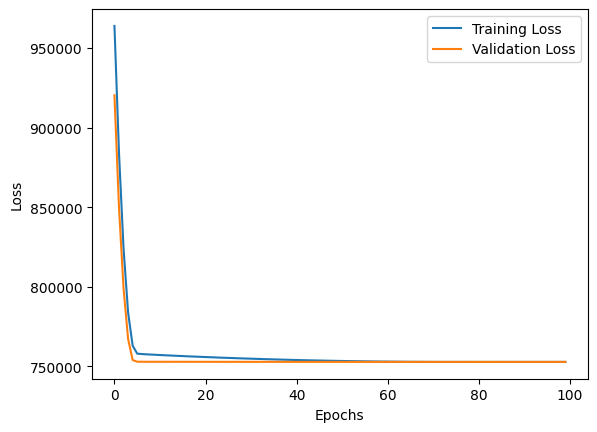

In [ ]:

import matplotlib.pyplot as plt
# Build LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error (Test): {mse}')

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# To make the model better

In [1]:
import pandas as pd
import numpy as np

# Load your data
data = pd.read_csv('/content/drive/MyDrive/walmart sales forecast/train.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract 'Year', 'Month', 'Day' components
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Create lagged features
data['Weekly_Sales_Lag1'] = data['Weekly_Sales'].shift(1)
data['Weekly_Sales_Lag2'] = data['Weekly_Sales'].shift(2)

# Create rolling statistics
data['Weekly_Sales_RollingMean'] = data['Weekly_Sales'].rolling(window=7).mean()
data['Weekly_Sales_RollingStd'] = data['Weekly_Sales'].rolling(window=7).std()

# Fill any NaN values resulting from the lagging/rolling operations
data.fillna(method='bfill', inplace=True)

# Select features and target variable
features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Weekly_Sales_Lag1', 'Weekly_Sales_Lag2', 'Weekly_Sales_RollingMean', 'Weekly_Sales_RollingStd']
target = 'Weekly_Sales'

# Scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])
scaled_target = scaler.fit_transform(data[[target]])

# Generate sequences for LSTM
def generate_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Adjust as needed
X, y = generate_sequences(scaled_features, scaled_target, seq_length)

# Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [2]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [3]:
from sklearn.metrics import mean_absolute_error

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)


In [4]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(12, 6))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend()
    plt.show()


Epoch 1/50
10539/10539 [==============================] - 78s 7ms/step - loss: 1.9302e-04 - val_loss: 7.5640e-05
Epoch 2/50
10539/10539 [==============================] - 75s 7ms/step - loss: 1.1727e-04 - val_loss: 6.2178e-05
Epoch 3/50
10539/10539 [==============================] - 69s 7ms/step - loss: 1.0207e-04 - val_loss: 6.0719e-05
Epoch 4/50
10539/10539 [==============================] - 71s 7ms/step - loss: 9.4927e-05 - val_loss: 5.6035e-05
Epoch 5/50
10539/10539 [==============================] - 77s 7ms/step - loss: 8.9661e-05 - val_loss: 5.3652e-05
Epoch 6/50
10539/10539 [==============================] - 71s 7ms/step - loss: 8.5083e-05 - val_loss: 5.1217e-05
Epoch 7/50
10539/10539 [==============================] - 73s 7ms/step - loss: 8.2539e-05 - val_loss: 4.8791e-05
Epoch 8/50
10539/10539 [==============================] - 76s 7ms/step - loss: 8.0109e-05 - val_loss: 5.2203e-05
Epoch 9/50
10539/10539 [==============================] - 76s 7ms/step - loss: 7.9259e-05 - val_

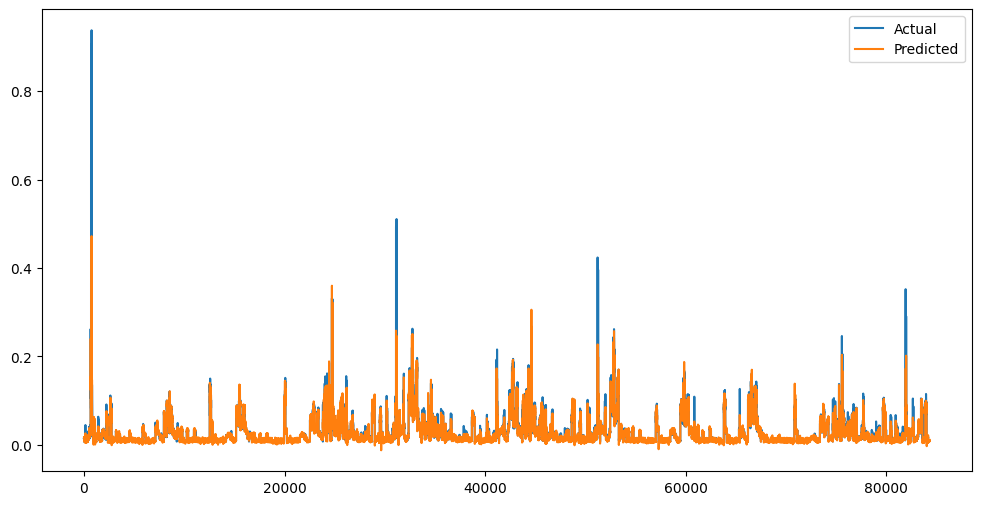

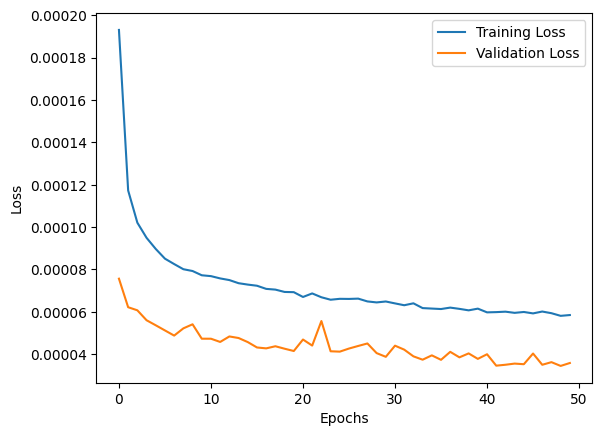

In [5]:
# Import necessary libraries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model using additional metrics
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = rmse(y_test, y_pred)
mae_test = mae(y_test, y_pred)

print(f'Mean Squared Error (Test): {mse_test}')
print(f'Root Mean Squared Error (Test): {rmse_test}')
print(f'Mean Absolute Error (Test): {mae_test}')

# Visual inspection of predictions
plot_predictions(y_test, y_pred)

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
